In [1]:
import sys; sys.path.append('../code')

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["ps.usedistiller"] = 'xpdf'

In [2]:
try:
    import run_analysis
except:
    import run_analysis_180 as run_analysis

probably could not import cvxpy, not an issue if you dont need it here


/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/total_variation_regularization/__total_variation_regularization__.py:12: UserWarning: Could not import cvxpy. Install cvxpy (http://www.cvxpy.org/install/index.html) to use                    convex total variation regularized derivatives.                    Recommended solver: MOSEK, free academic license available: https://www.mosek.com/products/academic-licenses/                    You can still use the iterative method.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:22: UserWarning: Could not import pychebfun. Install pychebfun (https://github.com/pychebfun/pychebfun/) to use chebfun derivatives.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:26: UserWarning: Could not import pydmd. Install pydmd (florisvb fork: https://github.com/florisvb/PyDMD) to 

In [3]:
import matplotlib.pyplot as plt
import utility
import numpy as np
import figurefirst as fifi
import pandas
import os
import matplotlib
import fly_plot_lib.plot as fpl

import scipy.interpolate
interp2d = scipy.interpolate.interp2d



In [4]:
from plot_utility import load_real_wind, get_filenames_sorted_by_tau_and_T, plot_error_heatmap
from plot_utility import get_optimal_psifreq_tau_vs_noise, plot_example_zeta_timeseries
from plot_utility import get_best_error_heatmap_across_Tmultipliers_and_optimal_Tmultipler
from plot_utility import get_error_heatmap_for_Tmultiplier, colorbar
import direct_trajectory_simulator

In [5]:
FONTSIZE = 7

# Instructions

Run this notebook for all of the following combinations to generate Fig. 9, as well as the supplemental figures.

##### Figure 9: 
  * phi_alignment='alignpsi'
  * windtype = 'realdynamic'
  * velocity_profile = 'absine'
  
##### Figure S3: 
  * phi_alignment='alignpsi'
  * windtype = 'realconstant'
  * velocity_profile = 'absine'
  
##### Figure S4: 
  * phi_alignment='alignpsi'
  * windtype = 'realdynamic'
  * velocity_profile = 'constant'
  
##### Figure S5: 
  * phi_alignment='aligngamma'
  * windtype = 'realdynamic'
  * velocity_profile = 'absine'

In [6]:
phi_alignment='alignpsi'
windtype = 'realdynamic'
velocity_profile = 'absine'

# Determine directory and fififig from selection of parameters

In [7]:
Tmultiplier = 1 
paramX = 1
directory = '../data_simulations/20220301_seed1_' + velocity_profile + '_' + phi_alignment + '_' + windtype
fififig = '../figures_svg/fig_9_' + velocity_profile + '_' + phi_alignment + '_' + windtype + '_Tmult' + str(Tmultiplier) + '.svg'
print(fififig)

../figures_svg/fig_9_absine_alignpsi_realdynamic_Tmult1.svg


# Example for debugging

../data_simulations/20220301_seed1_absine_alignpsi_realdynamic
cvx_windrealdynamic_random_turnamplitude180deg
only finding filenames containing: alignpsi
Filename:  ../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude180deg_absine_alignpsi_angularnoisestd0.3_psifreq0.5_tau0.4_T0.4_paramX1.hdf
15000 0.09999990463256836
biggest t:  1499.8985695838928
[ 0  5 10 15 20 25]
Median error:  0.2554110807714649
median + mean / 2:  0.5349063648267509


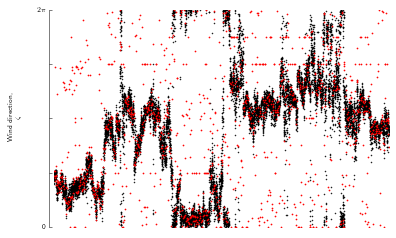

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
#directory = '20220210_absine_alignpsi_realdynamic'

plot_example_zeta_timeseries(directory, 180, 0.5, 0.4, 0.3, Tmultiplier=1, ax=ax, spines=['left'], 
                             windtype=windtype, phi_alignment=phi_alignment)


only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[1.05414107 0.94142112 0.94422786 0.59462167 0.95308597]
 [1.00872827 0.91847546 0.86203949 0.76367301 0.68693209]
 [0.95544053 0.77334765 0.520

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


(0.2, 350.0)

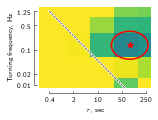

In [9]:
turn_angle = 180
angular_noise_std = 1.2
        
basename= 'cvx_wind' + windtype + '_random_turnamplitude' + str(turn_angle) + 'deg'

fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(111)

paramX = 1

error_heatmap = get_error_heatmap_for_Tmultiplier(directory,  basename, 
                                          angular_noise_std=angular_noise_std,
                                          Tmultiplier=Tmultiplier,
                                          phi_alignment=phi_alignment,
                                          paramX=paramX)

plot_error_heatmap(error_heatmap, directory, basename, angular_noise_std=angular_noise_std, 
                   Tmultiplier=1, paramX=paramX, use='median',
                   phi_alignment=phi_alignment,
                       show_xspine=True, show_yspine=True,
                       show_contour=False, ax=ax)

ax.set_xlim(0.2, 350)



# Plot trajectories

300 0.09999990463256836
Number of turns per sec:  0.16722423974502104
300 0.09999990463256836
Number of turns per sec:  0.16722423974502104


/home/caveman/TEST38/lib/python3.8/site-packages/figurefirst/svg_to_axes.py:1041: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(fw_in, fh_in))


300 0.09999990463256836
Number of turns per sec:  0.16722423974502104


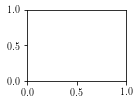

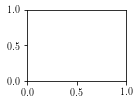

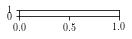

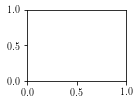

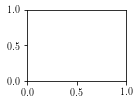

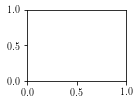

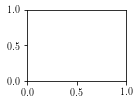

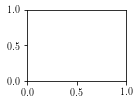

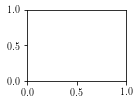

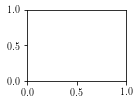

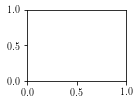

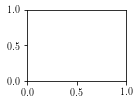

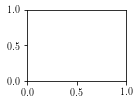

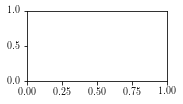

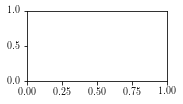

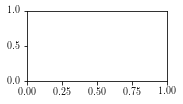

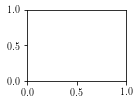

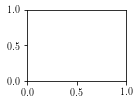

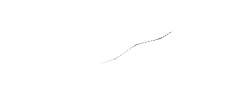

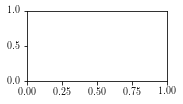

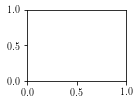

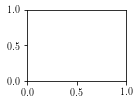

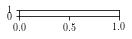

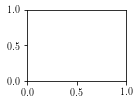

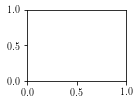

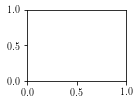

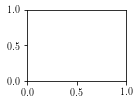

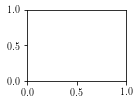

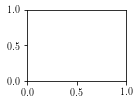

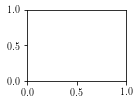

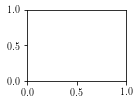

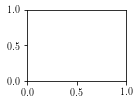

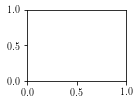

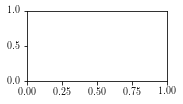

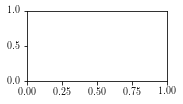

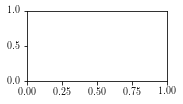

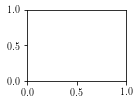

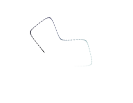

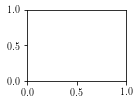

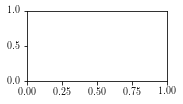

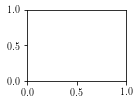

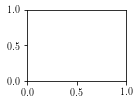

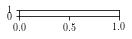

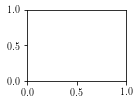

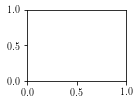

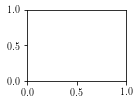

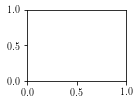

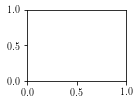

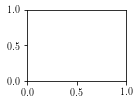

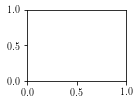

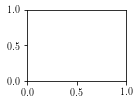

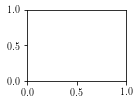

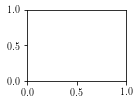

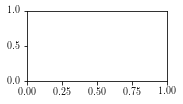

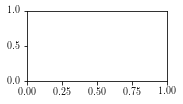

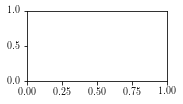

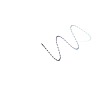

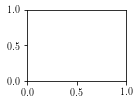

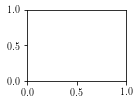

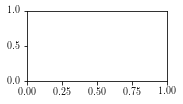

In [10]:
for turn_amplitude in ['20deg', '90deg', '180deg']:
    tag = 'trajec_' + turn_amplitude.split('deg')[0]


    psi_freq = 0.1
    smoothness_weight = 1
    
    random_seed = {'20deg': 7,
                   '90deg': 6,
                   '180deg': 7}[turn_amplitude]

    df, bmp = run_analysis.get_df_random( wind='realdynamic', 
                   L=300, 
                   psi_freq=psi_freq,
                   dt=0.1,
                   t=None,
                   turn_amplitude=turn_amplitude,
                   smoothness_weight=smoothness_weight,
                   angular_noise_std=0,
                   of_noise_std=0,
                   air_noise_std=0,
                   random_seed=random_seed,
                   velocity_profile=velocity_profile,
                   phi=phi_alignment)

    layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

    ax = layout.axes[(tag, tag)]

    #fig = plt.figure(figsize=(3.5,2), dpi=600)
    #ax = fig.add_subplot(111)
    direct_trajectory_simulator.plot_trajec(df, ax=ax, size_radius=0.4, nskip = 3, 
                                            show_wind_quivers=False)
    
    xmean = df.xpos.mean()
    ymean = df.ypos.mean()

    x = 6
    y = 6
    ax.set_xlim(xmean-x, xmean+x)
    ax.set_ylim(ymean-y, ymean+y)
    
    layout.append_figure_to_layer(layout.figures[tag], tag, cleartarget=True)
    layout.write_svg(fififig)

# Plot heatmap

only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[1.61132494 1.57642909 1.56657324 1.48165564 1.58431663]
 [1.32816938 1.28179192 1.24734583 1.26284777 1.47444841]
 [1.54361226 1.60220308 1.611

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])
/home/caveman/TEST38/lib/python3.8/site-packages/figurefirst/svg_to_axes.py:1041: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(fw_in, fh_in))


only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[1.33971732 1.26293279 1.32315258 1.301775   1.29847936]
 [2.00964906 2.07594747 2.21971905 2.1694469  2.02845063]
 [1.30632712 1.19642361 1.188

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[1.53740443 1.53837765 1.59052248 1.58047083 1.81291371]
 [1.23732564 1.20212271 1.17313515 1.12440798 1.39740345]
 [1.33958778 1.32515114 1.135

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[0.87110063 0.75742081 0.71594601 0.57291391 1.11646066]
 [0.71542055 0.59634025 0.47364116 0.63037209 0.59629399]
 [0.52553736 0.3082589  0.251

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.026329883828654 -1.1180792082621847
means:  2.0248692236666326 -1.117006991206949
7.575120233408524 0.3272578158002317 0.21065422245857007
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


30.28928904424816 0.30710795306140304 0.2646438897904878
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[0.81489281 0.66274572 0.64080243 0.59496755 0.58468448]
 [0.88081702 0.66305969 0.5889

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[0.82157037 0.66454673 0.61330506 0.42568884 0.42366   ]
 [0.7345486  0.59197074 0.53969895 0.69044819 0.83598897]
 [0.42174812 0.23970781 0.220

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


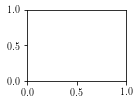

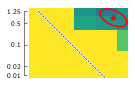

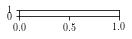

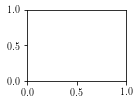

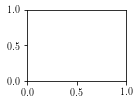

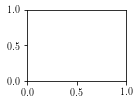

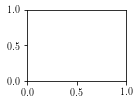

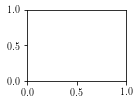

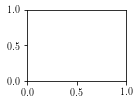

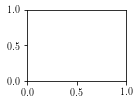

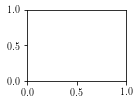

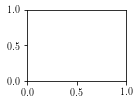

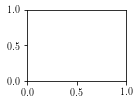

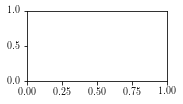

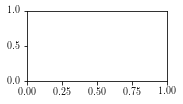

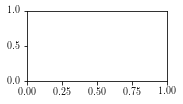

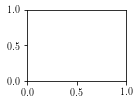

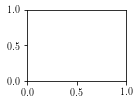

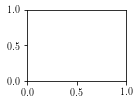

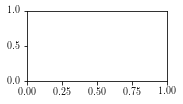

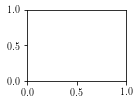

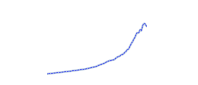

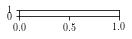

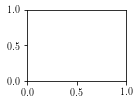

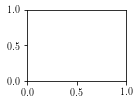

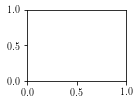

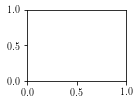

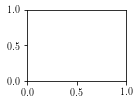

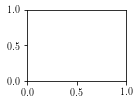

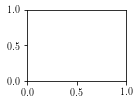

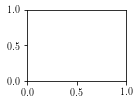

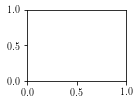

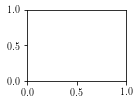

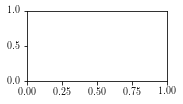

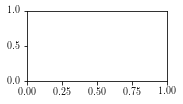

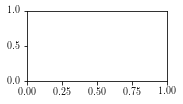

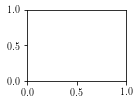

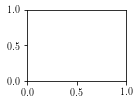

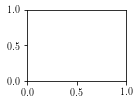

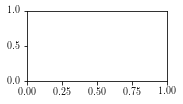

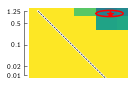

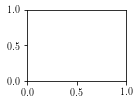

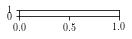

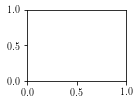

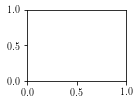

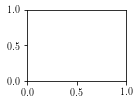

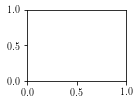

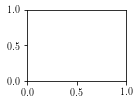

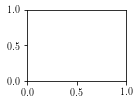

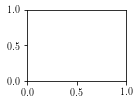

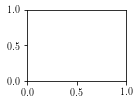

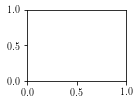

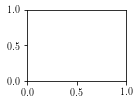

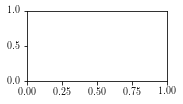

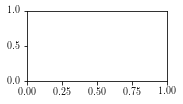

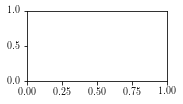

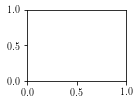

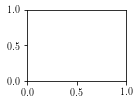

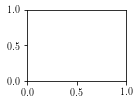

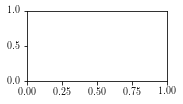

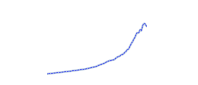

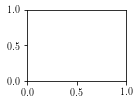

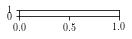

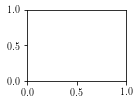

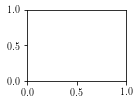

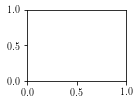

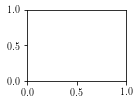

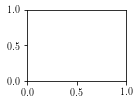

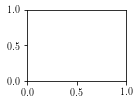

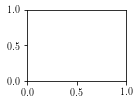

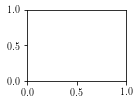

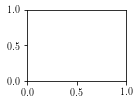

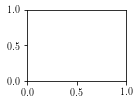

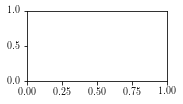

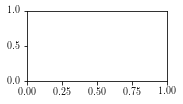

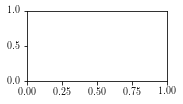

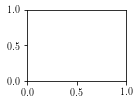

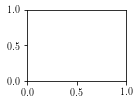

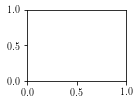

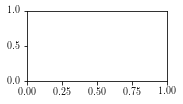

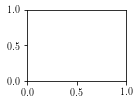

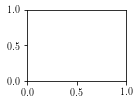

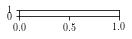

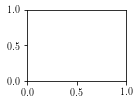

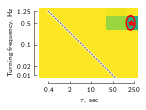

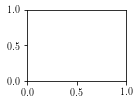

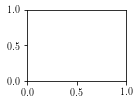

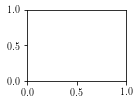

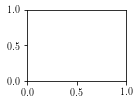

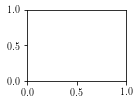

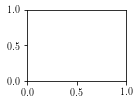

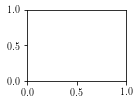

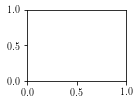

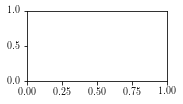

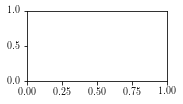

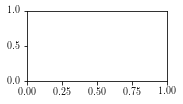

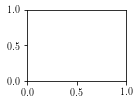

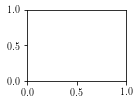

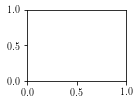

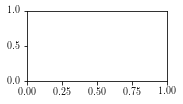

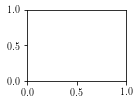

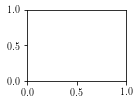

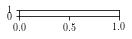

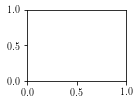

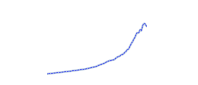

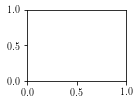

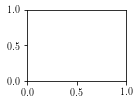

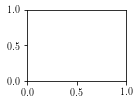

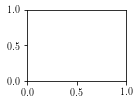

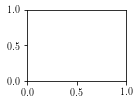

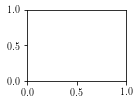

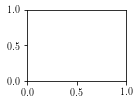

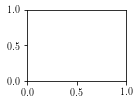

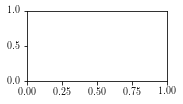

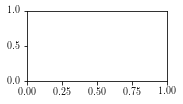

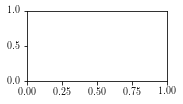

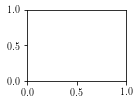

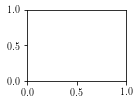

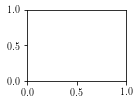

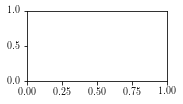

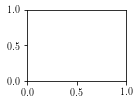

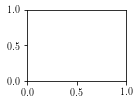

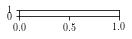

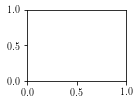

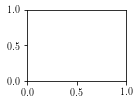

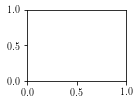

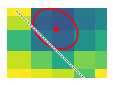

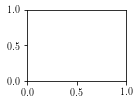

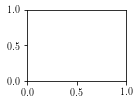

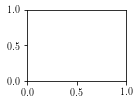

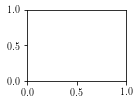

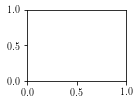

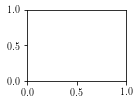

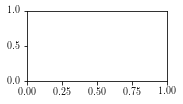

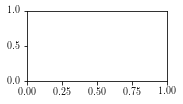

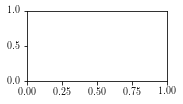

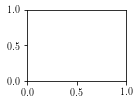

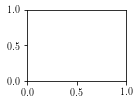

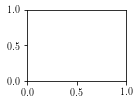

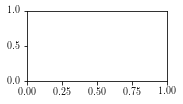

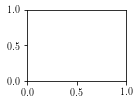

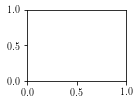

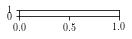

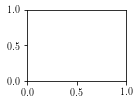

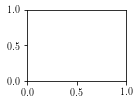

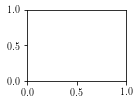

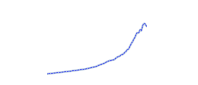

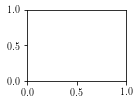

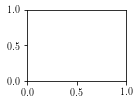

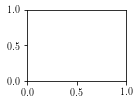

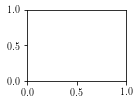

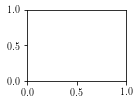

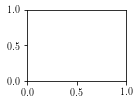

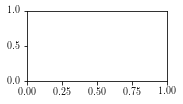

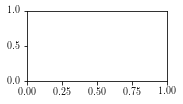

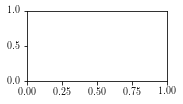

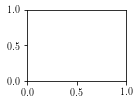

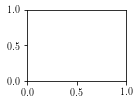

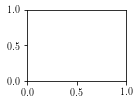

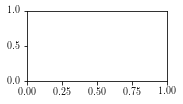

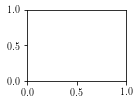

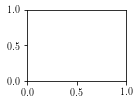

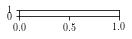

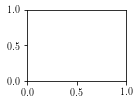

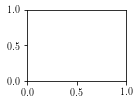

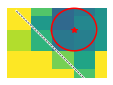

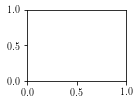

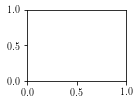

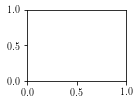

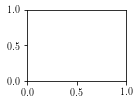

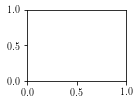

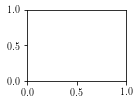

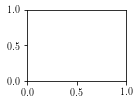

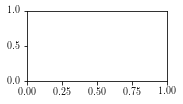

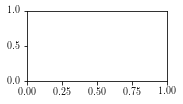

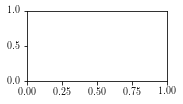

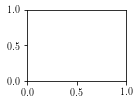

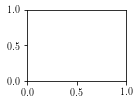

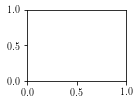

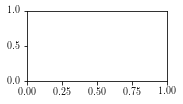

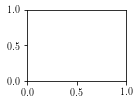

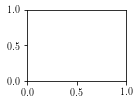

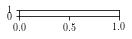

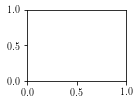

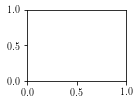

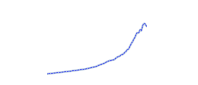

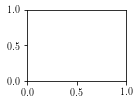

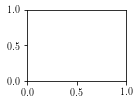

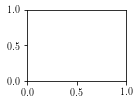

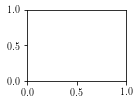

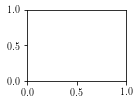

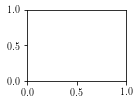

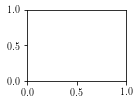

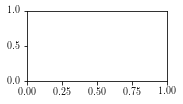

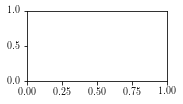

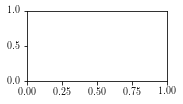

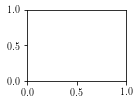

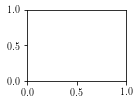

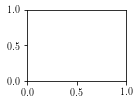

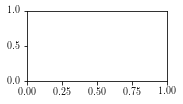

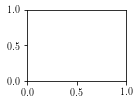

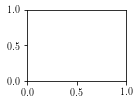

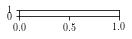

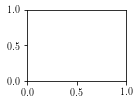

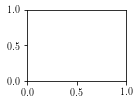

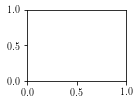

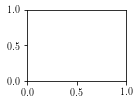

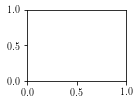

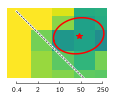

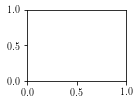

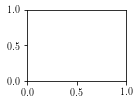

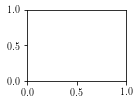

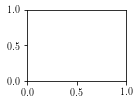

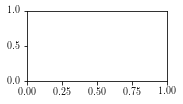

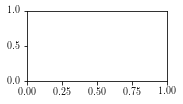

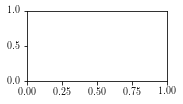

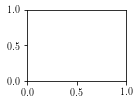

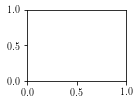

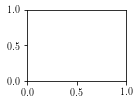

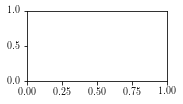

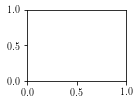

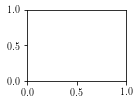

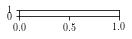

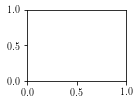

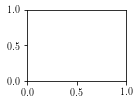

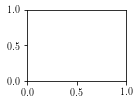

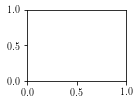

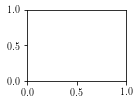

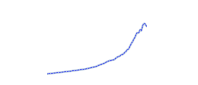

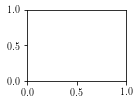

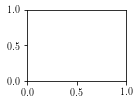

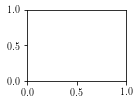

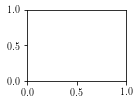

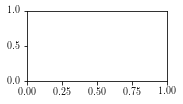

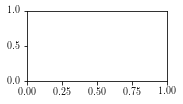

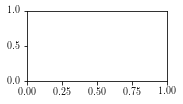

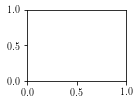

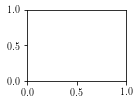

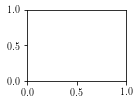

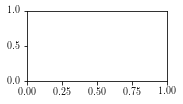

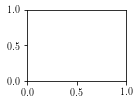

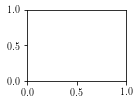

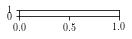

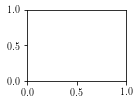

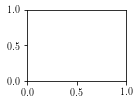

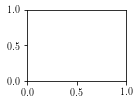

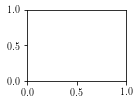

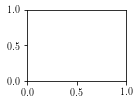

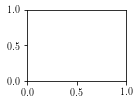

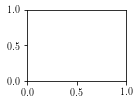

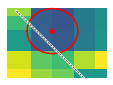

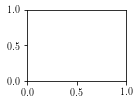

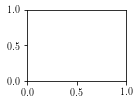

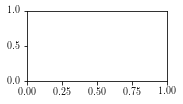

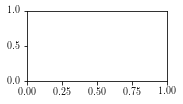

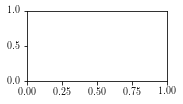

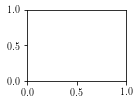

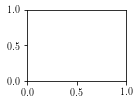

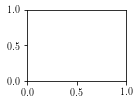

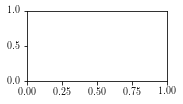

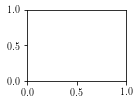

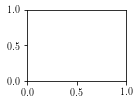

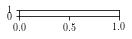

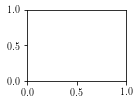

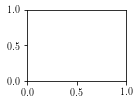

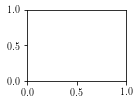

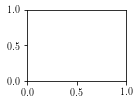

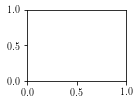

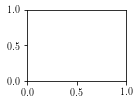

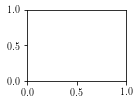

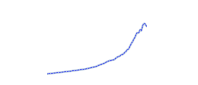

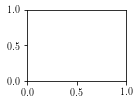

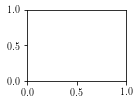

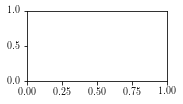

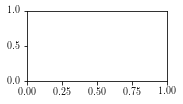

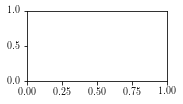

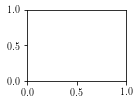

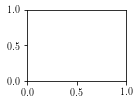

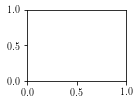

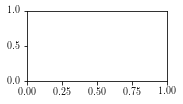

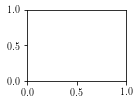

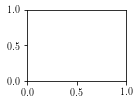

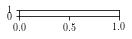

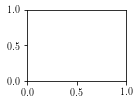

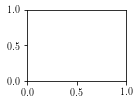

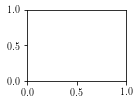

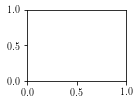

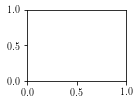

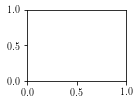

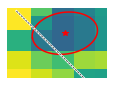

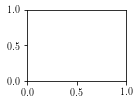

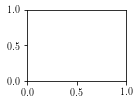

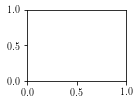

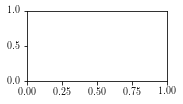

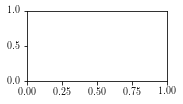

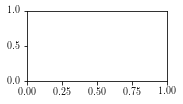

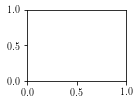

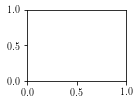

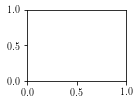

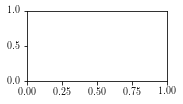

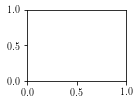

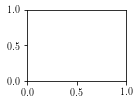

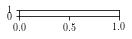

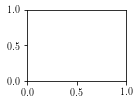

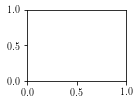

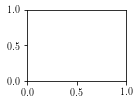

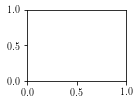

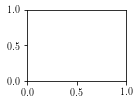

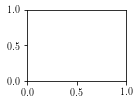

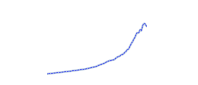

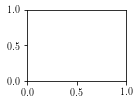

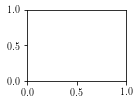

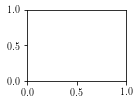

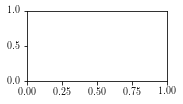

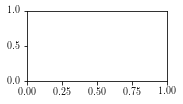

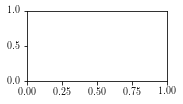

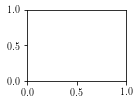

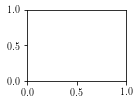

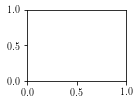

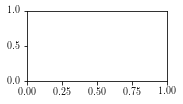

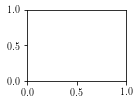

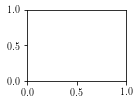

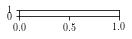

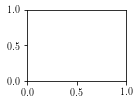

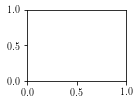

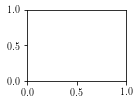

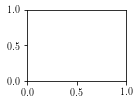

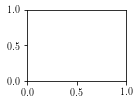

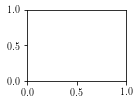

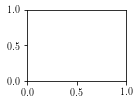

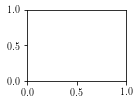

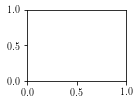

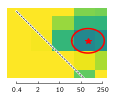

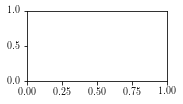

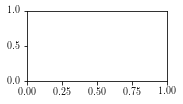

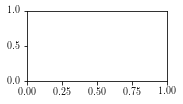

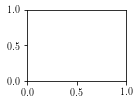

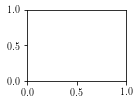

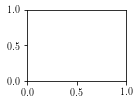

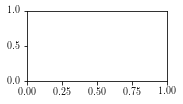

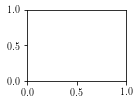

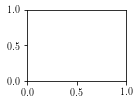

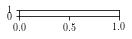

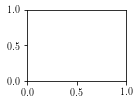

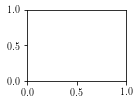

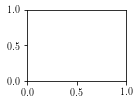

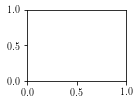

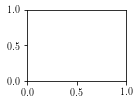

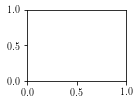

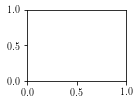

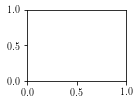

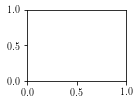

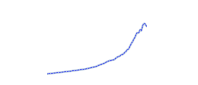

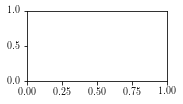

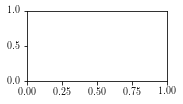

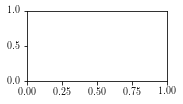

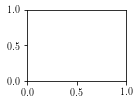

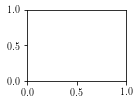

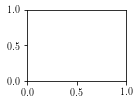

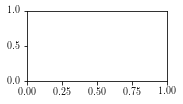

In [11]:
opt_Ts = {20: {0.3: None, 0.6: None, 1.2: None},
         90: {0.3: None, 0.6: None, 1.2: None},
         180: {0.3: None, 0.6: None, 1.2: None}}

for turn_angle in [20, 90, 180]:
    for angular_noise_std in [0.3, 0.6, 1.2]: # 0.9, 
        
        basename= 'cvx_wind' + windtype + '_random_turnamplitude' + str(turn_angle) + 'deg'

        # get tag
        deg = basename.split('turnamplitude')[1].split('deg')[0]
        noise_labels = {0.3: 'a',
                       0.6: 'b',
                       0.9: 'c',
                       1.2: 'd'}
        tag = deg + '_' + noise_labels[angular_noise_std]


        # determine spines:
        if deg == '20':
            show_yspine = True
        else:
            show_yspine = False

        if angular_noise_std == 1.2:
            show_xspine = True
        else:
            show_xspine = False

        # get axes and plot
        layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                               autogenlayers=True, make_mplfigures=True, hide_layers=[])

        ax = layout.axes[(tag, tag)]

        if Tmultiplier != 'best':
            error_heatmap = get_error_heatmap_for_Tmultiplier(directory,  basename, 
                                          angular_noise_std=angular_noise_std,
                                          Tmultiplier=Tmultiplier,
                                          phi_alignment=phi_alignment,
                                          paramX=paramX)
        else:
            error_heatmap, opt_T = get_best_error_heatmap_across_Tmultipliers_and_optimal_Tmultipler(directory,  
                                                                                              basename, 
                                          angular_noise_std=angular_noise_std,
                                          phi_alignment=phi_alignment,
                                          paramX=paramX)
            opt_Ts[turn_angle][angular_noise_std] = opt_T
        
        plot_error_heatmap(error_heatmap, directory, basename, angular_noise_std=angular_noise_std, 
                           Tmultiplier=1, paramX=paramX, use='median',
                           phi_alignment=phi_alignment,
                               show_xspine=show_xspine, show_yspine=show_yspine,
                               show_contour=False, ax=ax)

        ax.set_xlim(0.2, 350)

        layout.append_figure_to_layer(layout.figures[tag], tag, cleartarget=True)
        layout.write_svg(fififig)



        # plot wind
        layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                               autogenlayers=True, make_mplfigures=True, hide_layers=[])
        ax = layout.axes[(tag, tag)]

        df_real_dynamic_wind = pandas.read_hdf('../data_tmp/df_' + windtype + '_wind_percentiles.hdf5')
        ax.plot(df_real_dynamic_wind.lags, df_real_dynamic_wind.fifty, color='lightsteelblue', linewidth=2)
        ax.plot(df_real_dynamic_wind.lags, df_real_dynamic_wind.fifty, '--', color='blue', linewidth=0.5)
        ax.set_xscale('log')
        ax.set_xlim(0.2, 350)
        ax.set_ylim(0, 120)
        ax.minorticks_off()

        fifi.mpl_functions.adjust_spines(ax, [], 
                                         yticks = [0, 45, 90],
                                         spine_locations={'right': 5, 'bottom': 5},
                                         default_ticks=False,
                                         tick_length=2.5,
                                         linewidth=0.5,
                                         color='blue')

        #yticklabels = ['$' + str(y) + '^{\circ}$' for y in [0, 45, 90]]
        #ax.set_yticklabels(yticklabels)
        #ax.tick_params(axis='y', labelcolor='blue')
        #ax.set_ylabel('Median change in $\zeta$', color='blue', rotation=270)
        #ax.yaxis.set_label_position("right")

        fifi.mpl_functions.set_fontsize(ax, FONTSIZE)

        layout.append_figure_to_layer(layout.figures[tag], tag, cleartarget=False)
        layout.write_svg(fififig)

# Plot examples

../data_simulations/20220301_seed1_absine_alignpsi_realdynamic
cvx_windrealdynamic_random_turnamplitude90deg
only finding filenames containing: alignpsi
Filename:  ../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.5_tau0.4_T0.4_paramX1.hdf
15000 0.09999990463256836
biggest t:  1499.8985695838928
[ 0  5 10 15 20 25]
Median error:  0.3538707319325485
median + mean / 2:  0.6356621869909258


/home/caveman/TEST38/lib/python3.8/site-packages/figurefirst/svg_to_axes.py:1041: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(fw_in, fh_in))


../data_simulations/20220301_seed1_absine_alignpsi_realdynamic
cvx_windrealdynamic_random_turnamplitude20deg
only finding filenames containing: alignpsi
Filename:  ../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude20deg_absine_alignpsi_angularnoisestd0.6_psifreq0.1_tau10_T10_paramX1.hdf
15000 0.09999990463256836
biggest t:  1499.8985695838928
[ 0  5 10 15 20 25]
Median error:  0.969521187144534
median + mean / 2:  1.1010570446659749
../data_simulations/20220301_seed1_absine_alignpsi_realdynamic
cvx_windrealdynamic_random_turnamplitude90deg
only finding filenames containing: alignpsi
Filename:  ../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.6_psifreq0.1_tau10_T10_paramX1.hdf
15000 0.09999990463256836
biggest t:  1499.8985695838928
[ 0  5 10 15 20 25]
Median error:  0.21295834029473626
median + mean / 2:  0.45009195312442135
../data_simulatio

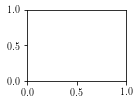

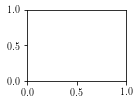

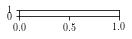

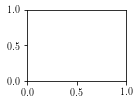

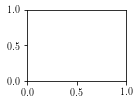

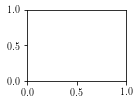

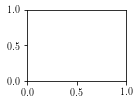

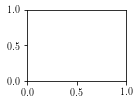

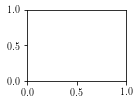

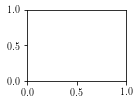

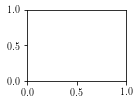

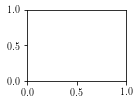

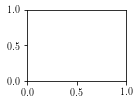

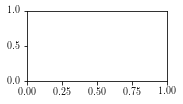

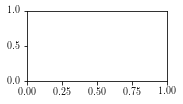

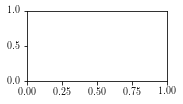

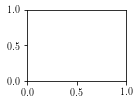

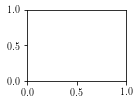

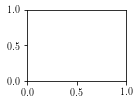

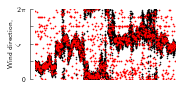

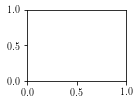

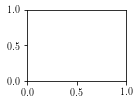

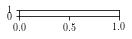

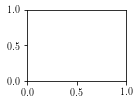

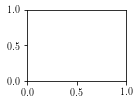

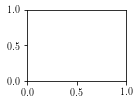

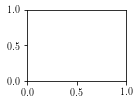

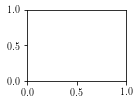

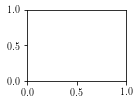

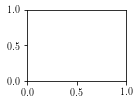

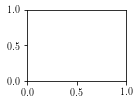

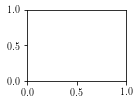

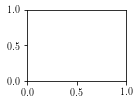

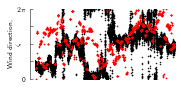

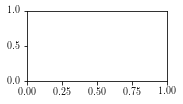

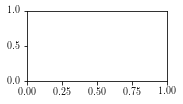

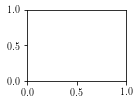

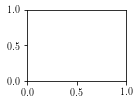

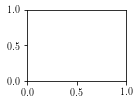

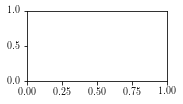

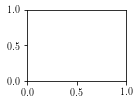

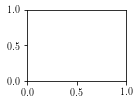

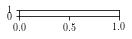

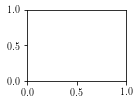

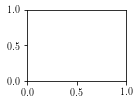

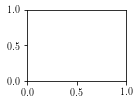

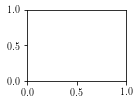

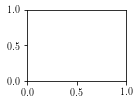

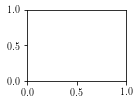

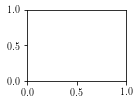

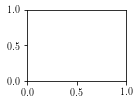

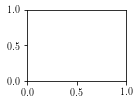

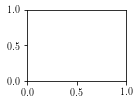

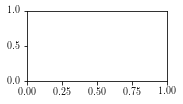

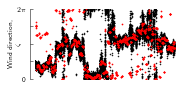

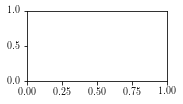

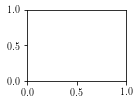

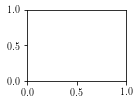

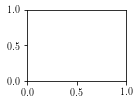

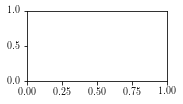

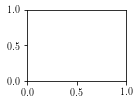

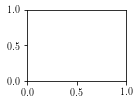

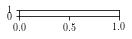

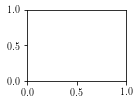

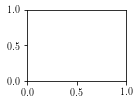

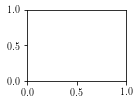

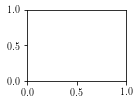

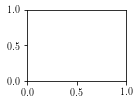

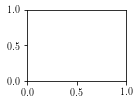

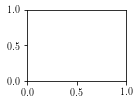

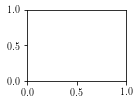

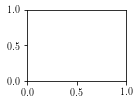

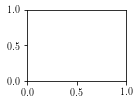

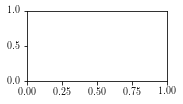

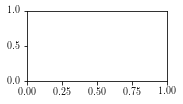

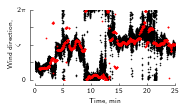

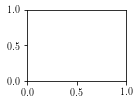

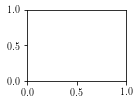

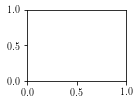

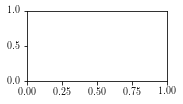

In [12]:
if Tmultiplier == 'best':
    for tag in ['example_b', 'example_c', 'example_d', 'example_e']:
        layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
        layout.append_figure_to_layer(layout.figures[tag], tag, cleartarget=True)
        layout.write_svg(fififig)
    
else:

    layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])
    tag = 'example_b'
    ax = layout.axes[(tag, tag)]
    #plot_example_zeta_timeseries(directory, 90, 1.25, 10, 0.3, ax=ax, spines=['left'], 
    #                             windtype=windtype, phi_alignment=phi_alignment)
    plot_example_zeta_timeseries(directory, 90, 0.5, 0.4, 0.3, Tmultiplier=1, ax=ax, spines=['left'], 
                             windtype=windtype, phi_alignment=phi_alignment)
    layout.append_figure_to_layer(layout.figures[tag], tag, cleartarget=True)
    layout.write_svg(fififig)


    layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])
    tag = 'example_c'
    ax = layout.axes[(tag, tag)]
    plot_example_zeta_timeseries(directory, 20, 0.1, 10, 0.6, ax=ax, spines=['left'], 
                                 windtype=windtype, phi_alignment=phi_alignment)
    layout.append_figure_to_layer(layout.figures[tag], tag, cleartarget=True)
    layout.write_svg(fififig)


    layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])
    tag = 'example_d'
    ax = layout.axes[(tag, tag)]
    plot_example_zeta_timeseries(directory, 90, 0.1, 10, 0.6, ax=ax, spines=['left'], 
                                 windtype=windtype, phi_alignment=phi_alignment)
    layout.append_figure_to_layer(layout.figures[tag], tag, cleartarget=True)
    layout.write_svg(fififig)


    layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])
    tag = 'example_e'
    ax = layout.axes[(tag, tag)]
    plot_example_zeta_timeseries(directory, 180, 0.1, 50, 1.2, ax=ax, spines=['left', 'bottom'], 
                                 windtype=windtype, phi_alignment=phi_alignment)
    layout.append_figure_to_layer(layout.figures[tag], tag, cleartarget=True)
    layout.write_svg(fififig)

# Colorbar

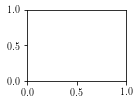

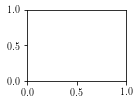

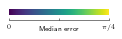

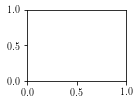

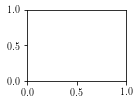

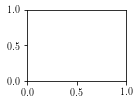

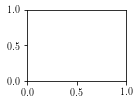

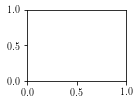

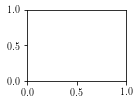

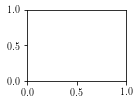

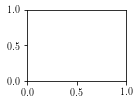

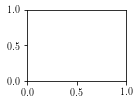

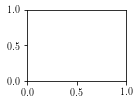

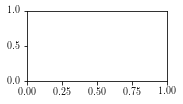

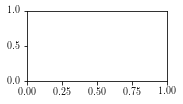

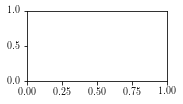

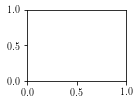

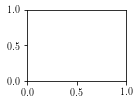

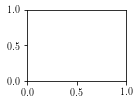

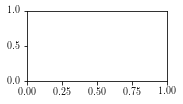

In [13]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])

ax = layout.axes[('colorbar', 'colorbar')]

colorbar(ax=ax, colormap='viridis', orientation='horizontal', ticks=[0, np.pi/4.])

xticks = [0, np.pi/8., np.pi/4.]
fifi.mpl_functions.adjust_spines(ax, ['bottom'], 
                                     xticks=xticks,
                                     tick_length=2.5,
                                     spine_locations={'right': 4},
                                     linewidth=0.5)

ax.set_xlabel('Median error')
ax.set_xlabel("Median error",rotation=0, labelpad=-5)

ax.set_xticklabels(['$0$', '', '$\pi/4$'])

fifi.mpl_functions.set_fontsize(ax, FONTSIZE)

layout.append_figure_to_layer(layout.figures['colorbar'], 'colorbar', cleartarget=True)
layout.write_svg(fififig)

# Display

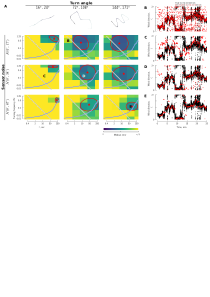

In [14]:
from IPython.display import display,SVG
display(SVG(fififig))